In [22]:
import pandas as pd
import time
from tqdm import tqdm_notebook
import pickle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open("data/Wordvectors.pkl", "rb") as f:
    wordvectors = pickle.load(f)
    
print(len(wordvectors))
wordvectors = pd.DataFrame(wordvectors)


28577


In [40]:
# Do kmeans
number_clusters = 10
start_time = time.time()
kmeans = KMeans(n_clusters=number_clusters).fit(wordvectors)
print(f"Kmeans took {time.time()-start_time:.3f} seconds")
wordvector_labels = kmeans.labels_

Kmeans took 17.802 seconds


In [43]:
rndperm = np.random.permutation(wordvectors.shape[0])
N = 10000
n_indx = rndperm[:N]

df_subset = wordvectors.loc[n_indx,:].copy()
start_time = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(df_subset)
print(f"t-SNE took {time.time()-start_time:.3f} seconds")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.204s...
[t-SNE] Computed neighbors for 10000 samples in 34.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.046398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.816238
[t-SNE] KL divergence after 300 iterations: 2.838642
t-SNE took 87.178 second

[24200  5113  9169 ... 25600 25800  4316]
[7 0 4 ... 6 0 4]


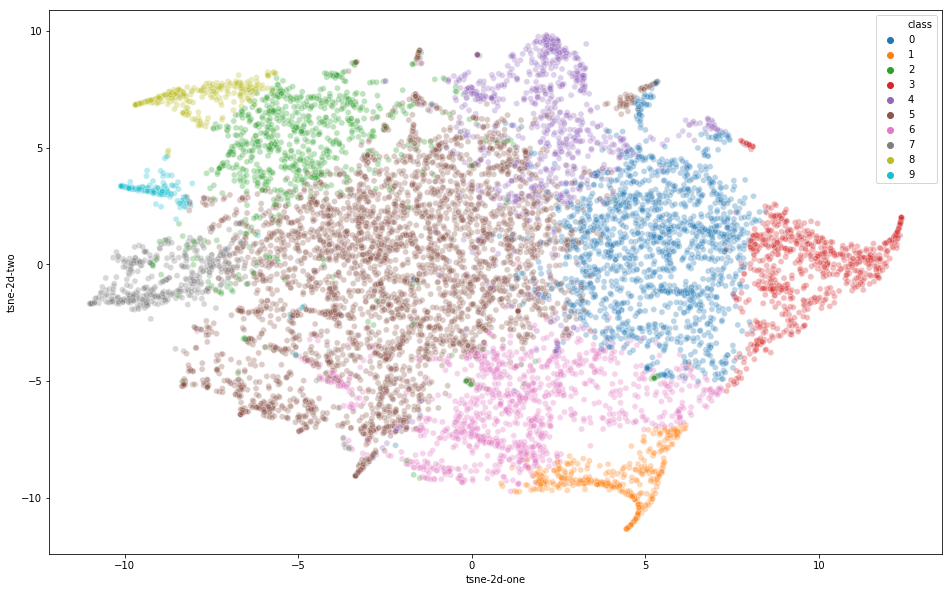

In [44]:
print(n_indx)
print(wordvector_labels[n_indx])
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset["class"] = wordvector_labels[n_indx]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette(n_colors=number_clusters),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [60]:
with open("data/Contexts.pkl", "rb") as f:
    prompts = pickle.load(f)
print(len(prompts))

# compare prompts from class 8 and 3 (farthest away)
class_ind1 = 7
class_ind2 = 3

for i in range(10):
    print(f"Class {class_ind1} {prompts[rndperm[wordvector_labels==class_ind1][i]]}")
print()
for i in range(10):
    print(f"Class {class_ind2} {prompts[rndperm[wordvector_labels==class_ind2][i]]}")

28577
Class 7 Jay Z and Beyoncé. I think that singing Hipbop songs is
Class 7 selling comic books. Jeff "Comic Book Guy" Albertson thinks that collecting is
Class 7 seeking revenge. Arya Stark doesn't think that injustices are
Class 7 studying magic tricks. Doctor Stephen Strange thinks that sleights of hand are
Class 7 with Monica Lewinsky. I think that causing political scandals is
Class 7 spying on girls. Norman Bates thinks that peepholes are
Class 7 eluding FBI profilers. Hannibal Lecter thinks that crime sprees are
Class 7 throwing TVs out of the windows. Keith Moon thinks that excesses are
Class 7 writing pop songs. Taylor Swift thinks that pop music is
Class 7 leading armies into battle. William the Conqueror thinks that conquests are

Class 3 organizing mass suicides. Jim Jones thinks that collective hysteria is
Class 3 shouting in Hollywood movies. Al Pacino thinks that rages are
Class 3 starring in romantic comedies. Dean Martin thinks that true loves are
Class 3 campaigning